# 07 군집화

# 07-01)  K-means Clustering 알고리즘 이해

K-means는 군집화에서 가장 일반적으로 사용되는 알고리즘. K-means는 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법.

1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음. 전체 데이터를 2개로 군집화하려면 2개의 중심을 임의의 위치에 가져다 놓는 것입니다.(임의의 위치에 군집 중심점을 가져다 놓으면 반복적인 이동 수행을 너무 많이 해서 수행 시간이 오래 걸리기 때문에 초기화 알고리즘으로 적합한 위치에 중심점을 가져다 놓지만, 여기서는 설명을 위해 임의의 위치로 가정)


2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속. 위 그림에서는 A, B 데이터가 같은 중심점에 소속되며, C,E,F 데이터가 같은 중심점에 소속됨.


3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동. 위 그림에서는 A, B 데이터 포인트의 평균 위치로 중심점이 이동했고, 다른 중심점 역시 C,E,F 데이터 포인트의 평균 위치로 이동.

4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경. 위 그림에서는 C 데이터가 기존의 중심점보다 더 가까운 중심점으로 변경.

5. 다시 중심을 소속된 데이터의 평균 중심으로 이동. 위 그림에서는 데이터 C가 중심 소속이 변경되면서 두 개의 중심이 모두 이동.

6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료. 그렇지 않다면 다시 4번 과정을 거쳐 소속을 변경하고 이 과정을 반복.



#### K-means의 장점.

- 일반적인 군집화에서 가장 많이 활용되는 알고리즘.
- 알고리즘이 쉽고 간결.


#### K-means의 단점.
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐! (이를 위해 PCA로 차원 감소를 적용해야 할 수 있음.)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집을 선택해야 할지 가이드하기 어려움.


#### scikit-learn Kmeans

Kmeans defalut 파라미터

class sklearn.cluster.KMeans(n_clusters= 8, init='k-means++', n_init=10, max_iter= 300, tol= 0.001, precompute_distances ='auto', verbose = 0, random_state =None, copy_x= True , n_jobs= 1, algorithm='auto')


이 중 중요한 파라미터는 다음과 같음.

- KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_cluster이며, 이는 군집화할 개수. 즉  군집 중심점의 개수를 의미.
- init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 K-means++ 방식으로 최초 설정.
- max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료.

다음은 주요 속성 정보.

- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_ceters_ : 각 군집 중심점 좌표(Shape는 [군집 개수, 피쳐 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있음.





## K-means를 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters= 3, init='k-means++', max_iter =300, random_state= 0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [5]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
### 타겟별 클러스터 확인!!

irisDF['target']= iris.target
irisDF['cluster'] = kmeans.labels_
iris_result= irisDF.groupby(['target','cluster'])['sepal_length'].count() ######
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [7]:
## 붓꽃 데이터 군집화 시각화.

from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)


irisDF['pca_x'] = pca_transformed[:, 0 ]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


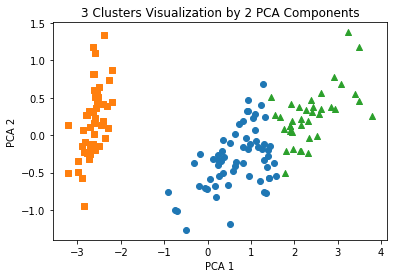

In [9]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


# 군집화 알고리즘 테스트를 위한 데이터 생성.

make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가돼 있으며 make classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있음. 둘 다 분류 용도로 테스트 데이터 생성이 가능. 이 외에 make_circle(), make_moon() API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용.


make_blobs()의 호출 파라미터

- n_samples : 생성할 총 데이터의 개수. 디폴트는 100개
- n_features: 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피쳐는 y 좌표상에 표현.
- centers : int 값. 예를 들어 3으로 설정하면 군집의 개수를 나타냄. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미.
- cluster_std ; 생성될 군집 데이터의 표준 편차를 의미. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐. [0.8,1.2,0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듬. 군집별로 서로 다른 표준 편차를 가진 데이터의 세트를 만들 때 사용.





In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [11]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


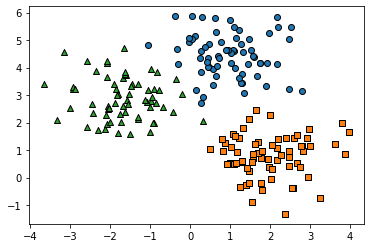

In [12]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

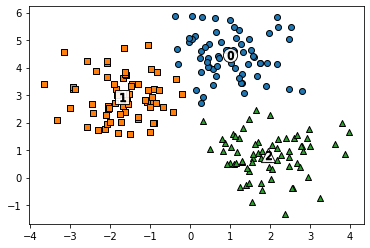

In [18]:
# KMeans 객체를 이용해 X 데이터를 K-means 클러스터링 수행
kmeans= KMeans(n_clusters =3, init='k-means++', max_iter =200, random_state =0)

cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers =kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
marker=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y= label_cluster['ftr2'], edgecolor= 'k', marker= markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color= 'white', alpha= 0.9 , edgecolor='k',marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70 , color='k', edgecolor='k', marker ='$%d$' % label )
    

plt.show()

In [22]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


# 02-  군집 평가 ( Cluster Evaluation)

군집화가 효율적으로 잘 됐는지 평가할 수 있는 지표 - 비지도하급의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어려움. 그럼에도 불구하고 군집화의 성능을 평가하는 대표적인 방법은 - 실루엣 분석.


### 실루엣 분석의 개요.
실루엣 분석은 각 군집간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄. 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미. 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을것.


실루엣 분석은 실루엣 계수를 기반. 실루엣 계수는 개별 데이터가 가지는 군집화 지표. 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 잇는 데이터와는 얼마나 멀리 분리돼 있는지를 나타냄.


(p420 그림참조)
특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i). 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반을 ㅗ계산. 두 군집 간의 거리가 얼마나 떨어져 있는 가의 값은 b(i) - a(i)이며 이 값을 정규화 하기 위해 MAX(a(i), b(i) ) 값으로 나눔. 따라서 i번째 데이터 포인트의 실루엣 계수 값 s(i)  = (b(i) - a(i) ) / (max( a(i), b(i) )


실루엣 계수는 -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것. (-) 값은 아에 다른 군집에 데이터 포인트가 할당됐음을 뜻함.


사이킷런은 이러한 실루엣 분석을 위해 다음과 같은 메서드 제공.
- sklearn.metrics.silhouette_sample(X, labels, metric='euclidean', **kwds) : 인자로 X_fetature 데이터 세트와 각 피쳐 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환.


- sklearn.metrics.silhouette_score(X, labels, metric= 'euclidean', sample_size= None, **kwds) : 인자로 X feature 데이터 세트와 각 피쳐 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣계수 값을 평균해 반환. 즉 np.mean(silhouette_samples())임. 일반적으로 이 값이 높을수록 군집화가 어늦어도 잘 됐다고 판단할 수 있음. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수는 없음.


좋은 군집화가 되려면 다음 기준 조건 만족이 필ㅇ!!!!!

- 1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhoutte_score() 값은 0 ~ 1사이의 값을 가지며, 1에 가까울수록 좋음!

- 2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에 크게 벗어나지 않는 것이 중요. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님!!!!


### 붓꽃 데이터 세트를 이용한 군집 평가

In [23]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [24]:
## 군집 칼럼별로 groupby 하여 silhoutte_coeff 칼럼의 평균값을 구함.

irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집개수 최적화 방법

전체 데이터의 평균 실루엣 계수값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘됐다고 볼수는 없음. 특정 군집 내의 실루엣 계수 값만 너무 높고 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음. 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균의 적절한 군집개수가 설정됐다고 판단할 수 있음.

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html       참조 必.



In [25]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

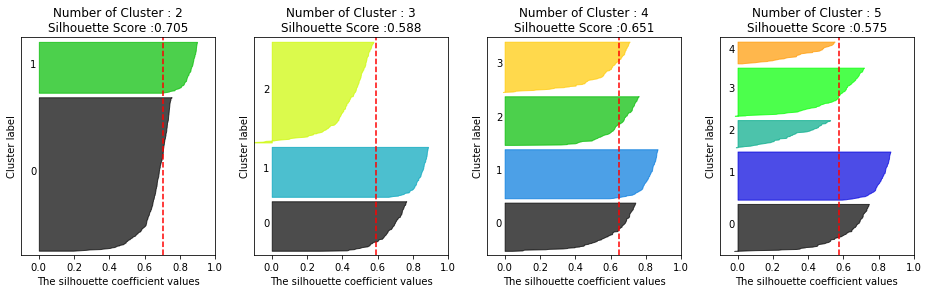

In [26]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

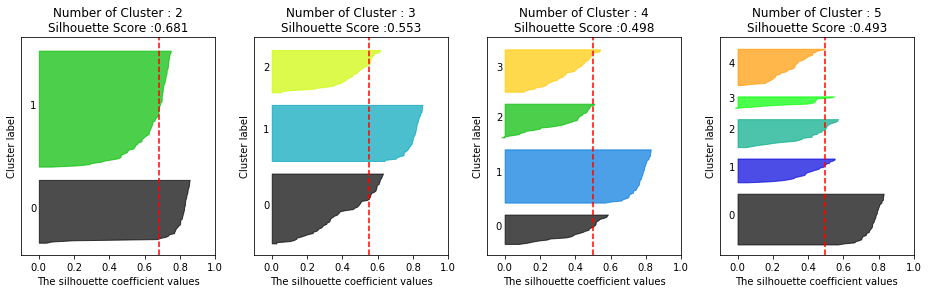

In [29]:
#### 만일 피처 데이터 세트 X_features에 대해서 군집이 2개일때와 3개, 4개 , 5개 일 때의 군집별 평균 실루엣 계수 값을 알고 싶을때 다음과 같이 호출.

from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

붓꽃 데이터를 K-means로 군집화할 경우에는 군집 개수를 2개로 하는 것이 가장 좋아보임. 3개의 경우 평균 실루엣 계수 값도2개보다 작을 뿐더러 1번 군집과 다른 0번, 2번 군집과의 실루엣 계수의 편차가 큼. 4개, 5개의 경우다 마ㅏㅊㄴ가지.



실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어남!! 특히 몇 만 건 이상의 데이터에 대해 사이킷런의 실루엣 계수 평가 API를 개인용 PC에서 수행할 경우 메모리 부족 등의 에러가 발생하기 쉬움. 이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야 함!!

# 03- 평균 이동

### 평균 이동의 개요

평균 이동(Mean Shift)은 K-means와 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행. 하지만 K-means이 중심에 소속된 데이터의 평균거리 중심으로 이동하는 데 반해. 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴.


평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾음. 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수(probability density)를 이용. 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)를 이용. 


평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾음. 

- 1 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포로들 KDE 기반의 Mean Shift 알고리즘으로 계산.
- 2 KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동 
- 3 모든 데이터를 1~2까지 수행하면서 데이터를 이동. 개별 데이터들이 군집중심점으로 모임.
- 4 지정된 반복횟수만큼 전체 데이터에 대해서 KDE 기반으로 데이터를 이동시키면서 군집화 수행
- 5 개별 데이터들이 모인 중심점을 군집 중심점으로 설정.


KDE(Kernel Density Estimation)는 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정. 확률 밀도 함수(Probability Denstiy Function)는 확률 변수의 분포를 나타내는 함수로, 널리 알려진 정규분포 함수를 포함해 감마 분포, t-분포 등이 있음.
확률 밀도 함수를 알면 특졍 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성(가령 정규 분포의 경우 평균,분산), 확률 분포 등 변수의 많은 요소를 알 수 있음.

KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용. 


대역폭 h는 KDE 형태를 부드러운(또는 뾰족한)형태로 평활화(Smoothing)하는 데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우 (P428~ 429) 다음 
h가 작을수록 과대적합 h가 클수록 과소 적합!!

따라서!! 적절한 DKE의 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동(Mean Shift)군집화에서 매우 중요.


일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가짐. 또한 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행. 사이킷런은 평균 이동 군집화를 위해 MeanShift 클래스를 제공. MeanShift 클래스의 가장 중요한 초기화 파라미터는 bandwidth이며 이 파라미터는 KDE의 대역폭 h와 동일. 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기 때문에 사이킷런은 최적의 대역폭 계산을 위해 estimate_bandwidth()함수를 제공. 


In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아짐. 

In [2]:
# bandwidth =1
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


데이터의 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 큰 영향을 미칠 수 있음. 따라서 MeanShift에서는 이 bandwidth를 최적화 값으로 설정하는 것이 매우 중요. 사이킷런은 최적화된 bandwidth 값을 찾기 위해서 estimate_bandwidth() 함수를 제공. estimate_bandwidth()의 파라미터로 피처 데이터 세트를 입력해주면 최적화된 bandwidth 값을 반환.

In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [4]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


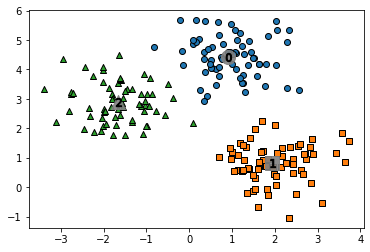

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()


In [9]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


평균 이동의 장점은 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 더 유연한 군집화가 가능. 또한 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없음. 하지만 알고리즘의 수행 시간이 오래 걸리고 무엇보다도 band-width의 크기에 따른 군집화 영향도가 매우 큼!!

이 같은 특징 때문에 일반적으로 평균 이동 군집화 기법은 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용!!!! 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 뛰어난 역할을 수행하는 알고리즘.

# 04- GMM(Gaussian Mixture Model)

### GMM(Gaussian Mixture Model 소개

GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식. 정규 분포(Normal distribution)로도 알려진 가우시안 분포는 좌우 대칭형의 종(Bell) 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수.


GMM(Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주. 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출. (P434)


전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 방식. 가렬 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식.



이와 같은 방식은 GMM에서는 모수 추정이라고 하는데, 모수 추정은 대표적으로 2가지를 추정.
- 개별 정규 분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률


이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용. 사이킷런은 이러한 GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기위해 GaussianMixture 클래스를 지원.



### GMM을 이용한 붓꽃 데이터 셋 클러스터링


GMM은 확률 기반 군집화이고 K-Means는 거리 기반 군집화.

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [13]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 3, random_state= 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF의 'gmm_cluster'컬럼명으로 저장
irisDF['gmm_cluster'] =gmm_cluster_labels
irisDF['target'] = iris.target


# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components. n_components는 gaussian mixture의 모델의 총 개수

In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


 GMM의 군집화 결과가 K-Means 보다 더 좋은데 이는 어떤 알고리즘에 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미. K-Means는 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화 수행될 수 있음.

### GMM 과 K-Means 클러스터링 비교

KMeans는 원형의 범위에서 군집화를 수행. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아짐. KMeans 군집화는 개별 군집의 중심에서 우너형의 범위로 데이터를 군집. KMeans는 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못함 ㅠㅠ

!!

visualize_cluster_plot(clusterobj,dataframe,label_name, iscluster=True)의 파라미터 설명.

- clusterobj : 사이킷런의 군집 수행 객체. KMeans나 GaussianMixture의 fit()와 predict()로 군집화를 완료한 객체. 만약 군집화 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력

- dataframe : 피처 데이터 세트와 label 값을 가진 DataFrame
- label_name : 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼 명, make_blobs() 결과 시각화일 경우는 dataframe 내의 target 칼럼 명

- iscenter : 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

In [16]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

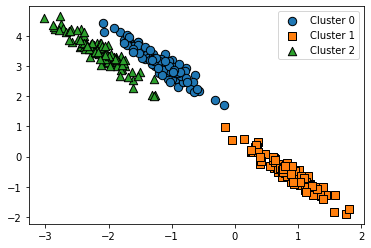

In [17]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


위와 같이 만들어진 데이터 세트에서는 KMeans 군집화 정확성이 떨어짐. KMeans가 위 데이터 세트를 어떻게 군집화하는지 확인.

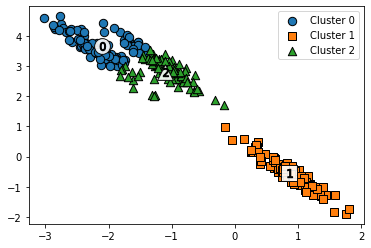

In [18]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음을 알 수 있음. KMeans가 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하면서 위와 같이 길쭉한 방향으로 데이터가 밀접해 있을 경우에는 최적의 군집화가 어려움 !!! 이번에는 GMM으로 군집화를 수행!!

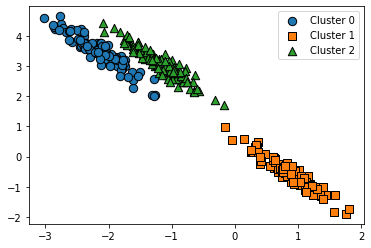

In [19]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)


데이터가 분포된 방향에 따라 정확하게 군집화됐음을 알 수 있음. GMM은 K-means와 다르게 군집의 중심 좌표를 구할 수 없기 때문에 ㅠㅠ 군집 중심 표현이 visualize_cluster_plot()에서 시각화 되지 않음 ㅠㅠ

In [20]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


KMeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target값과 어긋나는 경우가 발생. 하지만 GMM의 경우는 군집이 target 값과 잘 매핑 됨. 

이처럼 GMM의 경우는 KMeans보다  유연하게 다양한 데이터 세트에서 잘 적용될 수 있다는 장점이 있음. 하지만 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있다!!

# 05 - DBSCAN

### DBSCAN 개요
DBSCAN( Density Based Spatial Clustering of Applications with Noise)는 밀도 기반 군집화의 대표적인 알고리즘이다. DBSCAN은 간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다. 다음과 같이 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화한다고 가정할 때 앞에서 소개한 K-Means, 평균 이동, GMM으로는 효과적인 군집화를 수행하기 어려움!! DBSCAN은 특정 공간 내에 데이터 밀도 차이 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행함!!

DBSCAN을 구성하는 가장 중요한 두 가지 파라미터는 입실론(epsilon)으로 표기하는 주변 영역과 이 입실론 주변 영역에 포함되는 최소 데이터의 개수 min points이다.

- 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가진 원형의 영역.
- 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수.

입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의.

- 핵심 포인트(Core point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 함.
- 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 함.
- 경계 포인트(Border Point ): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 포인트를 경계 포인트라고 함.
- 잡음 포인트(Noist Point) : 최소 데이터 개수 이상으 ㅣ이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 함.

P443 그림 참조.

1. 다음 그림과 같이 P1에서 P12까지 12개의 데이터 세트에 대해서 DBSCAN 군집화를 적용하면서 주요 개념을 설명. 특정 입실론 반겨 내에 포함될 최소 데이터 세트를 6개로(자기 자신의 데이터를 포함) 가정하면,

2. P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개 자신은 P1, 이웃 데이터 P2, P6, P7 , P8,P9, P11)로 최소 데이터 5개 이상을 만족하므로 P1데이터는 핵심 포인트(Core Point)임.

3. 다음으로 P2 데이터 포인트를 보면 


DBSCAN은 이처럼 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식.

사이킷런은 DBSCAN 주요 파라미터

- eps: 입실론 주변 영역의 반경을 의미.
- min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미 (자신의 데이터를 포함.)




### DBSCAN 적용하기 - 붓꽃 데이터 셋

In [21]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [22]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8 , metric= 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)


irisDF['dbscan_cluster'] =dbscan_labels
irisDF['target'] = iris.target

iris_result= irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


일반적으로 eps 값으로는 1이하의 값을 설정.

dbscan_cluster의 -1은 노이즈를 의미!!!
따라서 위 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두 개의 군집으로 군집화 됨. Target 값의 유형이 3가지인데 , 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아님!! DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미!! 

In [23]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

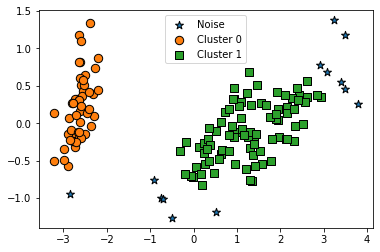

In [24]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

min_samples가 크면 반경 내 더 많은 데이터 허용 -> 노이즈 커짐

eps가 크면 -> 반경이 더커지고 -> 노이즈 데이터 개수 는 작아짐.


DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음!! DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는게 중요함!! 일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐. min_samples 를 크게하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 된다. 데이터 밀도가 더 커져야 하는데 매우 촘촘한 데이터 분포가 아닌 경우 노이즈로 인식하기 때문.

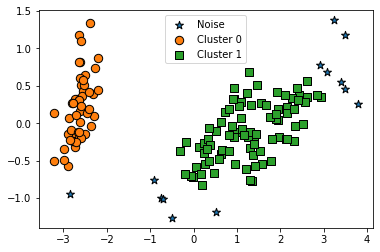

In [25]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


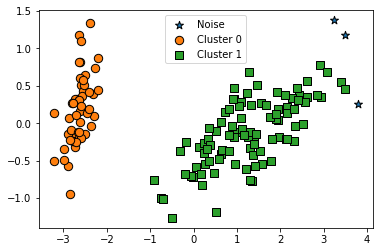

In [26]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


노이즈 군집인 -1이 3개밖에 없음. 기존에 eps가 0.6일 때 노이즈로 분류된 데이터 세트는 eps 반경이 커지면서 Cluster 1에 소속됨. 이번에는 eps를 기존 0.6으로 유지하고 min_samples를 16으로 늘림.

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


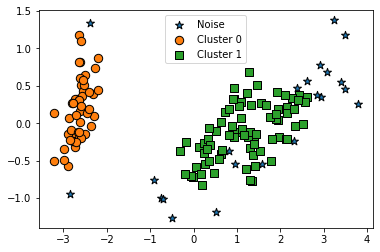

In [28]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

노이즈 데이터가 많이 증가함.

# DBSCAN 적용하기 - make_circles() 데이터 세트

복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘을 비교. 


make_circles() 이용 여기서 noise는 노이즈 데이터 세트의 비율이며, factor는 외부 원과 내부원의 scale 비율.

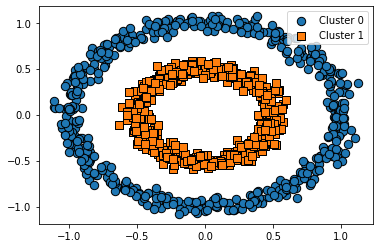

In [29]:
from sklearn.datasets import make_circles

X, y =make_circles(n_samples= 1000, shuffle = True , noise= 0.05 ,random_state =0 , factor= 0.5 )
clusterDF = pd.DataFrame(data =X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)




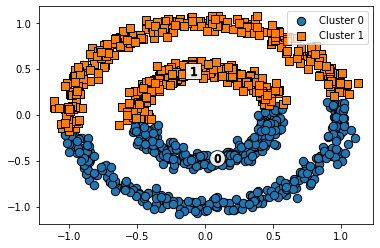

In [30]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


K-Means는 거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움.

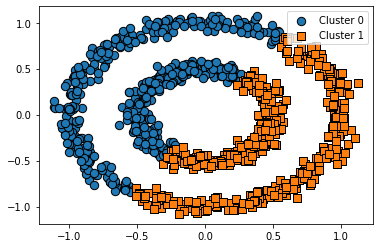

In [31]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)


GMM도 앞 절의 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능햇으나, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않았음.

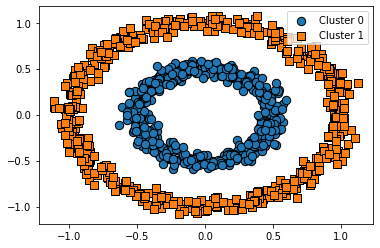

In [32]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)


DBSCAN 으로 군집화를 적용해 원하는 방향으로 정확히 군집화됨.

# 06 - 군집화 실습 - 고객 세그멘테이션

고객 세그멘테이션의 정의와 기법 : 고객 세그멘테이션은 다양한 기준으로 고객을 분류하는 기법을 지칭. 고객 세그멘테이션은 CRM이나 마케팅의 중요 기반 요소.

고객 세그멘테이션의 주요 목표는 타겟 마케팅. 타겟 마케팅이란 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것. 

고객 세그멘테이션은 고객의 어떤 요소를 기반으로 군집화할 것인가를 결정하는 것이 중요한데, 여기서는 기본적인 고객 분석 요소인 RFM 기법을 이용.

RFM 기법은 Recency(R), Frequency(F), Monetary Value(M)의 각 앞글자를 합한 것으로 각 단어의 의미는 다음과 같음.

- RECENCY (R) : 가장 최근 상품 구입 일에서 오늘까지의 기간
- FREQEUNCY(F) : 상품 구매 횟수
- MONETARY VALUE(M) : 총 구매 금액



분석단계는 (p453~ )참조

In [33]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [35]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel('Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [36]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [37]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [38]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [39]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


# RFM 기반 데이터 가공

In [40]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [41]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [42]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


그런데 지금 수행하려는 RFM 기반의 고객 세그멘테이션은 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 해 세그먼테이션을 수행하는 것. 이에 주문번호 + 상품코드 기준의 데이터를 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경. 이를 위해서 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 Group by.

주문 번호 기준의 retail_df_DataFrame에 groupby('CustomerID')를 적용해 CutstomerID 기준으로 df를 새롭게 생성. DataFrame의 groupby()만 사용해서는 여러 개의 칼럼에 서로 다른 aggregation 연산을 수행하기 힘듬. 따라서 DataFrameGroupby 객체에 agg()를 이용.

In [43]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### RFM 기반 고객 세그먼테이션

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

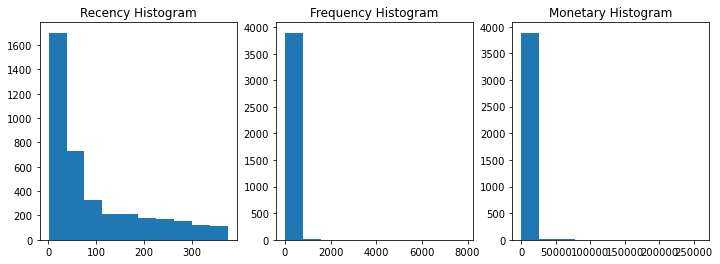

In [44]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

Recency, Frequencey, Monetary 모두 왜곡된 데이터 값 분포도를 가지고 있으며, 특히 Frequency, Monetary의 경우 특정 범위에 값이 몰려 있어서 왜곡 정도가 매우 심함.

In [45]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


#### 왜곡 정도가 매우 높은 데이터 세트에 K-means 평균 군집을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행됨!! 

먼저 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정한 뒤에 K-means를 수행

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


In [47]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [48]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

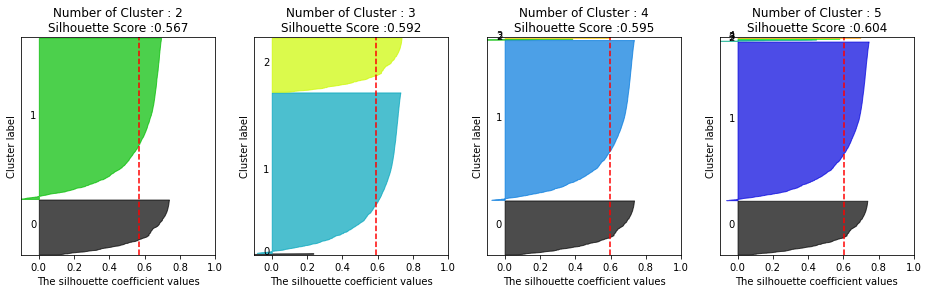

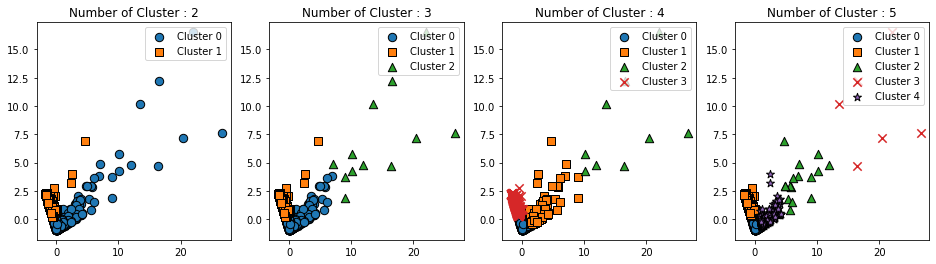

In [49]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

군집이 2개일 경우 0번 군집과 1번 군집이 너무 개괄적으로 군집화되었음. 군집 수를 증가시키면 개선이 가능할 것으로 예상 됐는데, 실제 결과는 너무 달랐다. 군집이 3개 이상일 때부터는 데이터 세트의 개수가 너무 작은 군집이 만들어짐. 이 군집에 속한 데이터는 개수가 작을뿐더러 실루엣 계수 역시 상대적으로 매우 작음. 

#### 이 데이터 세트의 경우 데이터 값이 거리 기반으로 광범위하게 퍼져 있어서 군집 수를 늘려봐야 이 군집만 지속적으로 분리하게 되기에 의미없는 군집화 결과로 이어지게 된다.


물론 이러한 특이한 데이터 세트를 분리하고 도출하는 것이 군집화의 목표임. 하지만, 이 정도로 크게 왜고고된 데이터 세트의 도출은 굳이 군집화를 이용하지 않고도 간단한 데이터 분석만으로 충분히 가능하다. 더구나 업무 로직을 알고 있는 분석가라면 이미 이 정도의 세그먼테이션 결과는 미리 알고 있었을 거임. 이처럼 
#### 지나치게 왜곡된 데이터 세트는 K-means 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과를 도출하게 된다!!


비지도학습 알고리즘의 하나인 군집화의 기능적 의미는 숨어 있는 새로운 집단을 발견하는 것이다. 이를 통해 전체 데이터를 다른 각도로 바라볼 수 있게 만들어 준다.

데이터 세트의 왜곡 정도를 낮추기 위해 가장 자주 사용되는 방법은 데이터 값에 로그(log)를 적용하는 로그 변환이다. 온라인 판매 데이터 세트의 왜곡정도를 낮추기 위해서 전체 데이터를 로그 변환 한 뒤에 K-means 알고리즘을 적용하고 결과를 비교.

In [50]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))


실루엣 스코어는 : 0.303


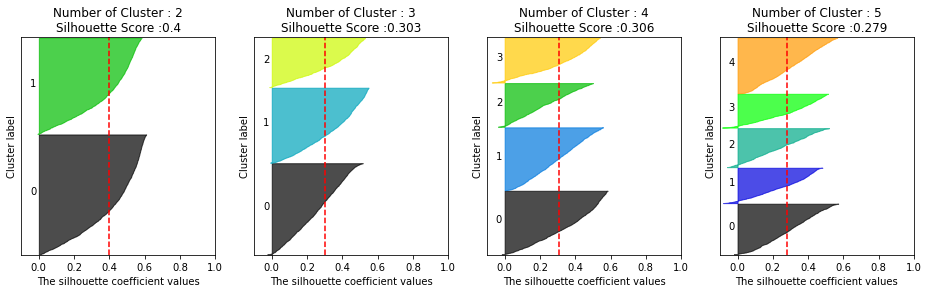

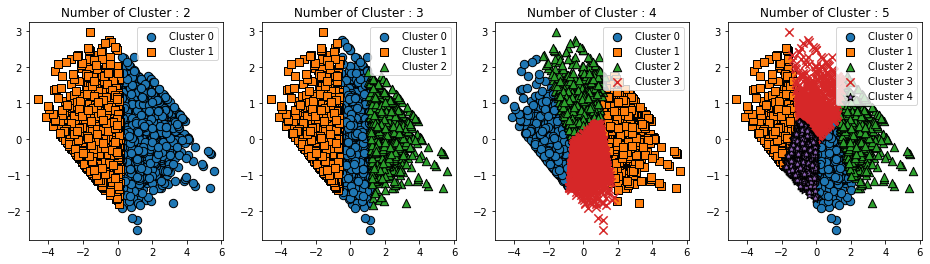

In [51]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

실루엣 스코언느 로그 변환 하기 전보다 떨어지지만, 실루엣 스코어의 절대치가 중요한 것이 아님을 앞의 예제에서 잘 알 ㅅ ㅜ있음!! 어떻게 개별 군집이 더 균일하게 나뉠 수 있는지가 더 중요하다. 로그 변환한 데이터 세트를 기반으로 실루엣 계수와 군집화 구성을 위에 시각화 했다.


실루엣 스코어는 로그 변환하기 전보다 떨어지지만 앞의 경우보다 더 균일하게 군집화가 구성됐음을 알 수 있다. 이처럼 왜곡된 데이터 세트에 대해서는 !! 로그 변환!! 으로 데이터를 일차 변환한 후에 군집화를 수행하면 더 나은 결과를 도출할 수 있다!!

# 07- 정리

- 군집화 기법은 나름의 장/단점을 가지고 있으며, 군집화하려는 데이터의 특성에 맞게 선택해야 한다. K-means의 경우 거리기반으로 군집 중심점을 이동시키면서 군집화를 수행한다. 매우 쉽고 직관적인 알고리즘으로 많ㅇ느 군집화 애플리케이션에 애용되지만, 복잡한 구조를 가지는 데이터 세트에 적용하기에는 한계가 있으며, 군집의 개수를 최적화하기 어렵다. K-means는 군집이 잘 되었는지의 평가를 위해 실루엣 계수를 이용한다.



- 평균 이동(Mean Shift)는 K-means와 유사하지만 거리 중심이 아니라 데이터가 모여있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행. 일반 업무 기반의 정형 데이터 세트보다는 컴퓨터 비전 영역에서 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행하는 알고리즘이다. (정형데이터 보단 컴퓨터 비전 등 이미지 데이터에서 많이 사용.)



- GMM(Gaussian Mixture Model) 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 모델을 섞어서 생성된 모델로 가정해 수행하는 방식이다. 전체 데이터 세트에서 서로 다른 정규 분포 형태를 추출해 이렇게 다른 정규 분포를 가진 데이터 세트를 각각 군집화하는 것이다. GMM의 경우는 K-means보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점과 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있다.


- DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화의 대표적인 알고리즘이다. DBSCAN은 입실론 주변 영역 내에 포함되는 최소 데이터 개수의 충족 여부에 따라 데이터 포인트를 핵심 포인트, 이웃 포인트, 경계 포인트, 잡음 포인트로 구분하고 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성하는 방식. DBSCAN은 간ㄷ나하고 직관적인 알고리즘으로 돼 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다.